In [ ]:
#@title **Montar la unidad**
import os
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/ai-uis-student/'
os.chdir(path)
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

In [4]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(303, 14)


age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6   56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7   44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8   52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9   57    1   2       150   168    0  ...      0      1.6      2   0     2       1

[10 rows x 14 columns]

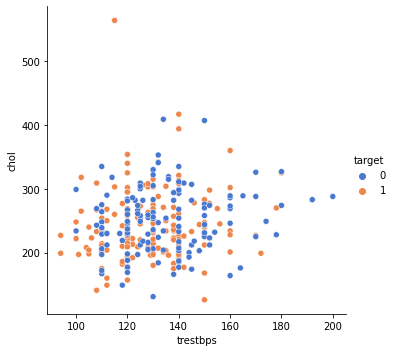

In [15]:
#Dataset
data_h = pd.read_csv("https://gitlab.com/gustavogarzonv/sets/-/raw/main/heart.csv")
print(data_h.shape)

sns.relplot(x="trestbps", y="chol", hue="target", palette="muted", data=data_h);

data_h.head(10)

# Seleccionar columnas **específicas** en Pandas conociendo su label:

In [9]:
from sklearn.model_selection import train_test_split

data = data_h[["trestbps", "thalach", "oldpeak"]]
data_y = data_h["target"]

# Seleccionar columnas **específicas** en Pandas conociendo su índice (números enteros):

In [14]:
# trestbps ---> 3
# restecg ---> 6
# cp ---> 2

indices_col = [3, 6, 2]
X_train = data_h.iloc[:,indices_col]
print(X_train)

     trestbps  restecg  cp
0         145        0   3
1         130        1   2
2         130        0   1
3         120        1   1
4         120        1   0
..        ...      ...  ..
298       140        1   0
299       110        1   3
300       144        1   0
301       130        1   0
302       130        0   1

[303 rows x 3 columns]


# Seleccionar filas **específicas** en Pandas conociendo su índice (números enteros):

In [16]:
indices_filas = [8, 3, 1]
X_train = data_h.iloc[indices_filas]
print(X_train)

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
8   52    1   2       172   199    1  ...      0      0.5      2   0     3       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1

[3 rows x 14 columns]


# Desactivar la opción `shuffle` en `train_test_split`

In [18]:
data = data_h[["trestbps", "thalach", "oldpeak"]]
data_y = data_h["target"]

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, shuffle=False)

# Método automático para ejecutar Leave One Out

In [23]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
list_a = []
for train_index, test_index in loo.split(data):
  X_train, X_test = data.iloc[train_index], data.iloc[test_index]
  y_train = data_y.iloc[train_index]    # Seleccionar filas específicas en Pandas conociendo su índice!
  y_test = data_y.iloc[test_index]      # Seleccionar filas específicas en Pandas conociendo su índice!
  #est = GaussianNB()                   # El estimador que se necesite
  #est.fit(X_train, y_train)            # Entrenamiento
  #y_pred = est.predict(X_test)         # Testeo
  #a = accuracy_score(y_pred, y_test)   # Accuracy
print("train_index", train_index)
print("test_index", test_index)

train_index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 24